In [60]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# System and file handling
import os

# Text processing
import re
from collections import Counter, defaultdict
from fuzzywuzzy import process
from itertools import combinations

In [7]:
# Load the Excel data
excel_file_path = "./CIRPASS-DPP-related-Initiatives-Dataset-2024-May-17/Results_initatives_questionnaire_for_publication_17-05-2024.xlsx"
df = pd.read_excel(excel_file_path)

# Display basic information about the data
print("Dataframe Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Dataframe Shape: (205, 44)
Columns: Index(['Initiative name', 'Initiative short name', 'Website',
       'Goal / USP / Benefit', 'Host organization name',
       'Host organization type', 'Solution type', 'Sector',
       'Potential for cross-sectors application ?',
       'Focus on final product or supply chain exchange', 'Market scope',
       'Current market penetration', 'Technology readiness', 'Business model',
       'Target group (e.g. data/platform user)', 'Relevance',
       'Company identification (data provider)', 't\ni\nk\nc\na\nr\n',
       'Product traceability', 'Functional and technical specifications',
       'Product material composition information',
       'Product design & service information', 'Product usage data',
       'Product repair data', 'Recycling data',
       'Circularity info & label (for consumer)',
       'Label, certification, compliance', 'Product ID: type',
       'Product ID: granularity', 'Type', 'Machine readable data carrier',
       'Resolver'

,Initiative name,Initiative short name,Website,Goal / USP / Benefit,Host organization name,Host organization type,Solution type,Sector,Potential for cross-sectors application ?,Focus on final product or supply chain exchange,...,Data transport openness level,Data packaging,Level,if advanced,Data use management,Evidence,Convenience,Data protection,Traceability,Further comments
0,3TAG,3TAG,NaN,3TAG is creating a dynamic DPP to track Scope ...,"3TAG, LTD",Private Company (Industry),Platform,Cross-sector (more than one),Yes,Both,...,proprietary,API,advanced,attribute based,enforcement,blockchain,Wallet,PETs,Integration with asset management and supply c...,NaN
1,3videnZ,3videnZ,NaN,Our 'Enriched Circular Product Passport' (CPP+...,Blockchain Certified Data,Private Company (Industry),Platform,"Cross-sector (more than one), Textile, Electro...",Yes,Final Product,...,standardized,Data transfer,advanced,role based,role based,blockchain,Wallet,Encryption,Tagging (QR),NaN
2,A Decentralized Blueprint for Digital Product ...,DPP by Digimarc & IOTA,NaN,This project was commissioned via the EU EBSI ...,Digimarc,Private Company (Industry),Platform,"Battery, Cross-sector",Yes,Final Product,...,standardized,API,advanced,role based,role based,verifiable credentials,Wallet,anonymization,"Tagging (QR), Tagging (NFC/RFID), Digital Wate...",You can fihttps://www.youtube.com/watch?v=NfJ4...
3,Acme,NaN,NaN,#OneTap Blockchain DPPs,Acme Labs,Private Company (Industry),Platform,Cross-sector (more than one),Yes,Final Product,...,standardized,API,simple,NaN,labelling,blockchain,Wallet,anonymization,Tagging (QR),We are a platform that helps companies easily ...
4,Adetex.CS,Circlolink Digital Product Passport via RFiD T...,NaN,Washable RFiD THREADS® DPP links products from...,Adetex.CS and Adetexs UK,Private Company (Industry),"Platform, Product Data Scheme, Traceability So...",Cross-sector (more than one),Yes,Both,...,cloud platform. RFID Threads connects to brand...,Data transfer,advanced,attribute based,role based,data is collected in real-time and alerts and ...,CIRCAA Cloud Platform is an app to collect dat...,privacy is enacted from brands using and setti...,"Tagging (QR), Tagging (NFC/RFID), worlds first...",To achieve national and international inclusiv...


In [8]:
# Basic statistics and information
print(df.info())  # Column types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Initiative name                                  205 non-null    object 
 1   Initiative short name                            190 non-null    object 
 2   Website                                          1 non-null      object 
 3   Goal / USP / Benefit                             192 non-null    object 
 4   Host organization name                           205 non-null    object 
 5   Host organization type                           204 non-null    object 
 6   Solution type                                    200 non-null    object 
 7   Sector                                           205 non-null    object 
 8   Potential for cross-sectors application ?        202 non-null    object 
 9   Focus on final product or supply

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display columns with missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Missing Values Overview:")
print(missing_data[missing_data['Missing Values'] > 0])

Missing Values Overview:
                                                 Missing Values  Percentage
Initiative short name                                        15    7.317073
Website                                                     204   99.512195
Goal / USP / Benefit                                         13    6.341463
Host organization type                                        1    0.487805
Solution type                                                 5    2.439024
Potential for cross-sectors application ?                     3    1.463415
Focus on final product or supply chain exchange               3    1.463415
Market scope                                                  2    0.975610
Current market penetration                                    6    2.926829
Technology readiness                                          3    1.463415
Business model                                               10    4.878049
Target group (e.g. data/platform user)                        3

In [10]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [11]:
# Display data types and unique values for each column
print("Column Data Types and Unique Values:")
for column in df.columns:
    print(f"{column}: {df[column].dtype}, Unique Values: {df[column].nunique()}")

Column Data Types and Unique Values:
Initiative name: object, Unique Values: 204
Initiative short name: object, Unique Values: 188
Website: object, Unique Values: 1
Goal / USP / Benefit: object, Unique Values: 192
Host organization name: object, Unique Values: 198
Host organization type: object, Unique Values: 19
Solution type: object, Unique Values: 33
Sector: object, Unique Values: 70
Potential for cross-sectors application ?: object, Unique Values: 2
Focus on final product or supply chain exchange: object, Unique Values: 3
Market scope: object, Unique Values: 5
Current market penetration: object, Unique Values: 3
Technology readiness: object, Unique Values: 6
Business model: object, Unique Values: 3
Target group (e.g. data/platform user): object, Unique Values: 186
Relevance: float64, Unique Values: 0
Company identification (data provider): object, Unique Values: 45
t
i
k
c
a
r
: float64, Unique Values: 0
Product traceability: object, Unique Values: 11
Functional and technical speci

In [12]:
# Summary for numerical columns
numerical_summary = df.describe()
print("Numerical Summary:")
print(numerical_summary)

# Summary for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"{column} - Unique Categories:")
    print(df[column].value_counts().head(10))  # Display top 10 most frequent values

Numerical Summary:
       Relevance  t\ni\nk\nc\na\nr\n  Label, certification, compliance
count        0.0                 0.0                               0.0
mean         NaN                 NaN                               NaN
std          NaN                 NaN                               NaN
min          NaN                 NaN                               NaN
25%          NaN                 NaN                               NaN
50%          NaN                 NaN                               NaN
75%          NaN                 NaN                               NaN
max          NaN                 NaN                               NaN
Initiative name - Unique Categories:
Initiative name
PlsReturnIt Inc                                                                                 2
3TAG                                                                                            1
Polytag limited                                                                              

## Pre-Processing

In [13]:
# Select the relevant columns
relevant_columns = [
    "Initiative name", "Initiative short name",
    "Goal / USP / Benefit", "Host organization type", "Solution type", "Sector",
    "Potential for cross-sectors application ?", "Focus on final product or supply chain exchange",
    "Market scope", "Current market penetration", "Technology readiness", "Business model",
    "Target group (e.g. data/platform user)",

    "Product traceability", "Functional and technical specifications",
    "Product material composition information", "Product design & service information",
    "Product usage data", "Product repair data", "Recycling data",
    "Circularity info & label (for consumer)",

    "Product ID: type", "Product ID: granularity", "Type",
    "Machine readable data carrier", "Resolver",

    "ID minting", "Data storage location", "Data transport openness level",
    "Data packaging", "Level", "if advanced",

    "Data use management", "Evidence", "Convenience", "Data protection",
    "Traceability"
]

# Create a working copy with only the relevant columns
df_cleaned = df[relevant_columns].copy()

# Display the shape of the cleaned DataFrame
print("Cleaned DataFrame Shape:", df_cleaned.shape)

Cleaned DataFrame Shape: (205, 37)


In [14]:
# Check for missing values in the cleaned DataFrame
missing_values = df_cleaned.isnull().sum().sort_values(ascending=False)
print("Missing Values Overview (Cleaned DataFrame):")
print(missing_values[missing_values > 0])

Missing Values Overview (Cleaned DataFrame):
Convenience                                        69
if advanced                                        69
Data protection                                    68
Evidence                                           54
Data use management                                53
Data packaging                                     39
Level                                              38
ID minting                                         36
Type                                               35
Traceability                                       33
Product traceability                               33
Product ID: granularity                            33
Data transport openness level                      31
Resolver                                           30
Machine readable data carrier                      30
Product ID: type                                   29
Data storage location                              26
Recycling data                       

In [15]:
# Handle missing values for critical columns (imputation with placeholder)
critical_columns = [
    "Goal / USP / Benefit", "Solution type", "Sector", "Host organization type"
]

# Fill missing values in critical columns with "Unknown"
df_cleaned[critical_columns] = df_cleaned[critical_columns].fillna("Unknown")

# Dynamically identify moderate columns
moderate_missing_cols = [
    col for col in df_cleaned.columns
    if col not in critical_columns and df_cleaned[col].isnull().mean() > 0
]

# Impute moderate columns with appropriate logic
for col in moderate_missing_cols:
    if df_cleaned[col].dtype == "object":  # For categorical/text columns
        df_cleaned[col] = df_cleaned[col].fillna("Unknown")
    else:  # For numerical columns
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Verify if all missing values have been resolved
remaining_missing = df_cleaned.isnull().sum().sort_values(ascending=False)
print("Remaining Missing Values (Post-Cleanup):")
print(remaining_missing[remaining_missing > 0])

Remaining Missing Values (Post-Cleanup):
Series([], dtype: int64)


In [16]:
df_cleaned.head()

,Initiative name,Initiative short name,Goal / USP / Benefit,Host organization type,Solution type,Sector,Potential for cross-sectors application ?,Focus on final product or supply chain exchange,Market scope,Current market penetration,...,Data storage location,Data transport openness level,Data packaging,Level,if advanced,Data use management,Evidence,Convenience,Data protection,Traceability
0,3TAG,3TAG,3TAG is creating a dynamic DPP to track Scope ...,Private Company (Industry),Platform,Cross-sector (more than one),Yes,Both,International,Low,...,Decentralized,proprietary,API,advanced,attribute based,enforcement,blockchain,Wallet,PETs,Integration with asset management and supply c...
1,3videnZ,3videnZ,Our 'Enriched Circular Product Passport' (CPP+...,Private Company (Industry),Platform,"Cross-sector (more than one), Textile, Electro...",Yes,Final Product,EU,Medium,...,Decentralized,standardized,Data transfer,advanced,role based,role based,blockchain,Wallet,Encryption,Tagging (QR)
2,A Decentralized Blueprint for Digital Product ...,DPP by Digimarc & IOTA,This project was commissioned via the EU EBSI ...,Private Company (Industry),Platform,"Battery, Cross-sector",Yes,Final Product,International,Medium,...,Decentralized,standardized,API,advanced,role based,role based,verifiable credentials,Wallet,anonymization,"Tagging (QR), Tagging (NFC/RFID), Digital Wate..."
3,Acme,Unknown,#OneTap Blockchain DPPs,Private Company (Industry),Platform,Cross-sector (more than one),Yes,Final Product,International,Low,...,Decentralized,standardized,API,simple,Unknown,labelling,blockchain,Wallet,anonymization,Tagging (QR)
4,Adetex.CS,Circlolink Digital Product Passport via RFiD T...,Washable RFiD THREADS® DPP links products from...,Private Company (Industry),"Platform, Product Data Scheme, Traceability So...",Cross-sector (more than one),Yes,Both,International,Low,...,Decentralized,cloud platform. RFID Threads connects to brand...,Data transfer,advanced,attribute based,role based,data is collected in real-time and alerts and ...,CIRCAA Cloud Platform is an app to collect dat...,privacy is enacted from brands using and setti...,"Tagging (QR), Tagging (NFC/RFID), worlds first..."


In [17]:
# Define a dictionary with the current column names as keys and the new column names as values
new_column_names = {
  "Initiative name": "Initiative_Name",
  "Initiative short name": "Initiative_Short_Name",
  "Goal / USP / Benefit": "Goal_USP_Benefit",
  "Host organization type": "Host_Organization_Type",
  "Solution type": "Solution_Type",
  "Sector": "Sector",
  "Potential for cross-sectors application ?": "Potential_Cross_Sector",
  "Focus on final product or supply chain exchange": "Focus_Final_Product_Supply_Chain",
  "Market scope": "Market_Scope",
  "Current market penetration": "Current_Market_Penetration",
  "Technology readiness": "Technology_Readiness",
  "Business model": "Business_Model",
  "Target group (e.g. data/platform user)": "Target_Group",
  "Product traceability": "Product_Traceability",
  "Functional and technical specifications": "Functional_Technical_Specifications",
  "Product material composition information": "Product_Material_Composition",
  "Product design & service information": "Product_Design_Service",
  "Product usage data": "Product_Usage_Data",
  "Product repair data": "Product_Repair_Data",
  "Recycling data": "Recycling_Data",
  "Circularity info & label (for consumer)": "Circularity_Info_Label",
  "Product ID: type": "Product_ID_Type",
  "Product ID: granularity": "Product_ID_Granularity",
  "Type": "Identifier_Type",
  "Machine readable data carrier": "Machine_Readable_Data_Carrier",
  "Resolver": "Resolver",
  "ID minting": "ID_Minting",
  "Data storage location": "Data_Storage_Location",
  "Data transport openness level": "Data_Transport_Openness_Level",
  "Data packaging": "Data_Packaging",
  "Level": "Level",
  "if advanced": "If_Advanced",
  "Data use management": "Data_Use_Management",
  "Evidence": "Evidence",
  "Convenience": "Convenience",
  "Data protection": "Data_Protection",
  "Traceability": "Traceability"
}

# Rename the columns
df_cleaned.rename(columns=new_column_names, inplace=True)

# Display the updated DataFrame
df_cleaned.head()

,Initiative_Name,Initiative_Short_Name,Goal_USP_Benefit,Host_Organization_Type,Solution_Type,Sector,Potential_Cross_Sector,Focus_Final_Product_Supply_Chain,Market_Scope,Current_Market_Penetration,...,Data_Storage_Location,Data_Transport_Openness_Level,Data_Packaging,Level,If_Advanced,Data_Use_Management,Evidence,Convenience,Data_Protection,Traceability
0,3TAG,3TAG,3TAG is creating a dynamic DPP to track Scope ...,Private Company (Industry),Platform,Cross-sector (more than one),Yes,Both,International,Low,...,Decentralized,proprietary,API,advanced,attribute based,enforcement,blockchain,Wallet,PETs,Integration with asset management and supply c...
1,3videnZ,3videnZ,Our 'Enriched Circular Product Passport' (CPP+...,Private Company (Industry),Platform,"Cross-sector (more than one), Textile, Electro...",Yes,Final Product,EU,Medium,...,Decentralized,standardized,Data transfer,advanced,role based,role based,blockchain,Wallet,Encryption,Tagging (QR)
2,A Decentralized Blueprint for Digital Product ...,DPP by Digimarc & IOTA,This project was commissioned via the EU EBSI ...,Private Company (Industry),Platform,"Battery, Cross-sector",Yes,Final Product,International,Medium,...,Decentralized,standardized,API,advanced,role based,role based,verifiable credentials,Wallet,anonymization,"Tagging (QR), Tagging (NFC/RFID), Digital Wate..."
3,Acme,Unknown,#OneTap Blockchain DPPs,Private Company (Industry),Platform,Cross-sector (more than one),Yes,Final Product,International,Low,...,Decentralized,standardized,API,simple,Unknown,labelling,blockchain,Wallet,anonymization,Tagging (QR)
4,Adetex.CS,Circlolink Digital Product Passport via RFiD T...,Washable RFiD THREADS® DPP links products from...,Private Company (Industry),"Platform, Product Data Scheme, Traceability So...",Cross-sector (more than one),Yes,Both,International,Low,...,Decentralized,cloud platform. RFID Threads connects to brand...,Data transfer,advanced,attribute based,role based,data is collected in real-time and alerts and ...,CIRCAA Cloud Platform is an app to collect dat...,privacy is enacted from brands using and setti...,"Tagging (QR), Tagging (NFC/RFID), worlds first..."


In [18]:
def clean_text(text):
    """
    Cleans a string by:
      - Removing unwanted non-alphanumeric chars (except spaces & commas).
      - Replacing multiple spaces with a single space.
      - Lowercasing and stripping.
    """
    if isinstance(text, str):
        text = re.sub(r"[^a-zA-Z0-9\s,]", "", text)  # keep alphanumerics, spaces, commas
        text = re.sub(r"\s+", " ", text)            # collapse multiple spaces
        return text.strip().lower()
    return text


def normalize_and_split(series):
    """
    For a given Series, splits string cells on commas into a list of items.
    Returns the transformed Series where each row is now a list of strings.
    """
    return series.apply(
        lambda x: [item.strip().lower() for item in x.split(",")] if isinstance(x, str) else []
    )

def normalize_and_split_smart(column):
    """
    Normalize and split multi-value columns, preserving text inside parentheses.
    Ensures results are lower-case and stripped of extra whitespace.
    Args:
        column: Pandas Series to process.
    """
    def split_preserve_parentheses(value):
        if isinstance(value, str):
            # Find all protected matches (parentheses)
            protected = re.findall(r'\(.*?\)', value)
            # Create a placeholder map
            placeholder_map = {f"__PARENTHESIS_{idx}__": text for idx, text in enumerate(protected)}
            
            # Replace protected text with placeholders
            for placeholder, text in placeholder_map.items():
                value = value.replace(text, placeholder)
            
            # Split on commas outside parentheses
            parts = [item.strip() for item in value.split(",")]
            
            # Restore placeholders back to their original text
            restored_parts = []
            for part in parts:
                for placeholder, text in placeholder_map.items():
                    part = part.replace(placeholder, text)
                restored_parts.append(part)
            
            # Finally, convert all parts to lowercase
            return [part.lower() for part in restored_parts]
        return []
    
    return column.apply(split_preserve_parentheses)

def standardize_values(values, replacements):
    """
    For a list of items:
      - If an item appears in 'replacements' dict, map it directly.
      - Otherwise keep it as is.
    Returns the updated list (or the original value if not a list).
    """
    if not isinstance(values, list):
        return values  # e.g., if it's not a list, return as is

    return [replacements.get(val, val) for val in values]


def apply_partial_match(values, partial_rules):
    """
    For a list of items, do partial (keyword) matching per 'partial_rules'.
    'partial_rules' is a list of (keyword, label) pairs, e.g.:
      partial_rules = [
         ("cross", "cross-sector"),
         ("electron", "electronics"),
         ("textile", "textile"),
      ]
    If the item contains the keyword (case-insensitive), we unify to label.
    If multiple keywords match, the first match in partial_rules takes precedence.
    """
    if not isinstance(values, list):
        return values

    new_list = []
    for val in values:
        v_lower = val.lower()
        replaced = False
        for keyword, label in partial_rules:
            if keyword in v_lower:
                new_list.append(label)
                replaced = True
                break
        if not replaced:
            new_list.append(val)
    return new_list

def apply_partial_match_str(text, partial_rules):
    """
    For a single string 'text', check each (keyword, label) in partial_rules.
    Match keywords as whole words using regex. If no match, return original text.
    """
    if not isinstance(text, str):
        return text

    for keyword, label in partial_rules:
        # Match as whole word (e.g., "national" won't match "international")
        if re.search(rf'\b{keyword}\b', text.lower()):
            return label
    return text  # No matches => return original

In [19]:
# Define free-text columns
free_text_columns = ["Goal_USP_Benefit"]

# Apply text cleaning
df_cleaned[free_text_columns] = df_cleaned[free_text_columns].map(clean_text)

In [20]:
# Define multi-value columns
multi_value_columns = ["Sector", "Solution_Type", "Host_Organization_Type", "Technology_Readiness",
                       "Target_Group", "Product_Traceability", "Product_Material_Composition", 
                       "Product_Design_Service", "Product_Usage_Data", "Product_Repair_Data", "Recycling_Data",
                       "Circularity_Info_Label", "Product_ID_Type", "Product_ID_Granularity", "Identifier_Type", "Traceability"]

# Normalize and split multi-value columns
for col in multi_value_columns:
    df_cleaned[col] = normalize_and_split_smart(df_cleaned[col])

In [21]:
# Define replacements for standardizing values
replacements = {
    "cross-sector (more than one)": "cross-sector",
    "cross-sector (more then one)": "cross-sector",
    "cross-sector": "cross-sector",
}

# Apply replacements to standardize values
df_cleaned["Sector"] = df_cleaned["Sector"].apply(
    lambda x: standardize_values(x, replacements)
)

In [22]:
partial_rules = [
    ("all of the above", "combination"),
    ("combination", "combination"),
    ("platform", "platform"),
    ("traceability", "traceability solution"),
    ("data scheme", "product data scheme"),
    ("standard", "standard"),
    ("others", "others"),
]

df_cleaned["Solution_Type"] = df_cleaned["Solution_Type"].apply(
    lambda x: apply_partial_match(x, partial_rules)
)

In [23]:
partial_rules = [
    ("regional", "Regional"),
    ("national", "National"),
]

df_cleaned["Market_Scope"] = df_cleaned["Market_Scope"].apply(
    lambda x: apply_partial_match_str(x, partial_rules)
)

In [24]:
# Add count columns for multi-value fields
for col in multi_value_columns:
    df_cleaned[f"{col}_count"] = df_cleaned[col].apply(len)

In [25]:
# Normalize binary columns
binary_columns = [
    "Potential_Cross_Sector", 
    "Machine_Readable_Data_Carrier",
    "Resolver"
]
df_cleaned[binary_columns] = df_cleaned[binary_columns].applymap(
    lambda x: "yes" if str(x).strip().lower() in ["yes", "y", "true", "1"] 
    else "no" if str(x).strip().lower() in ["no", "n", "false", "0"] 
    else "unknown"
)

/var/folders/zk/xy1d6l8d4qxcmccygcsylx_80000gp/T/ipykernel_8798/355302301.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned[binary_columns] = df_cleaned[binary_columns].applymap(


In [26]:
# Verify the final structure of the dataset
# df_cleaned.info()
df_cleaned.head()

,Initiative_Name,Initiative_Short_Name,Goal_USP_Benefit,Host_Organization_Type,Solution_Type,Sector,Potential_Cross_Sector,Focus_Final_Product_Supply_Chain,Market_Scope,Current_Market_Penetration,...,Product_Material_Composition_count,Product_Design_Service_count,Product_Usage_Data_count,Product_Repair_Data_count,Recycling_Data_count,Circularity_Info_Label_count,Product_ID_Type_count,Product_ID_Granularity_count,Identifier_Type_count,Traceability_count
0,3TAG,3TAG,3tag is creating a dynamic dpp to track scope ...,[private company (industry)],[platform],[cross-sector],yes,Both,International,Low,...,4,1,1,1,2,4,1,1,1,1
1,3videnZ,3videnZ,our enriched circular product passport cpp uni...,[private company (industry)],[platform],"[cross-sector, textile, electronics, battery, ...",yes,Final Product,EU,Medium,...,5,1,4,3,1,10,1,4,2,1
2,A Decentralized Blueprint for Digital Product ...,DPP by Digimarc & IOTA,this project was commissioned via the eu ebsi ...,[private company (industry)],[platform],"[battery, cross-sector]",yes,Final Product,International,Medium,...,1,2,1,2,2,5,2,3,4,3
3,Acme,Unknown,onetap blockchain dpps,[private company (industry)],[platform],[cross-sector],yes,Final Product,International,Low,...,1,1,1,1,1,1,1,1,1,1
4,Adetex.CS,Circlolink Digital Product Passport via RFiD T...,washable rfid threads dpp links products from ...,[private company (industry)],"[platform, product data scheme, traceability s...",[cross-sector],yes,Both,International,Low,...,6,7,7,2,2,9,1,4,2,3


In [27]:
# df_cleaned.to_csv("df_cleaned.csv", index=False)

## Data Analysis

Technology_Readiness
application    124
prototype       69
concept         38
unknown          3
Name: count, dtype: int64


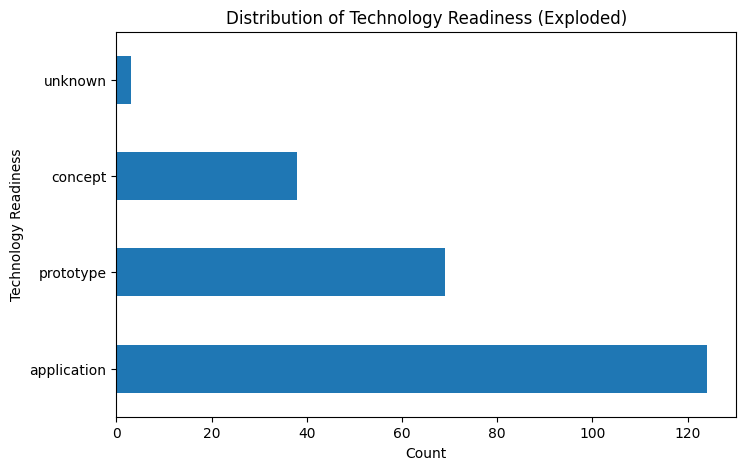

In [28]:
df_exploded = df_cleaned.explode('Technology_Readiness')

# Check frequency
counts = df_exploded['Technology_Readiness'].value_counts(dropna=False)
print(counts)

# Plot a bar chart
counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Technology Readiness (Exploded)")
plt.xlabel("Count")
plt.ylabel("Technology Readiness")
plt.show()

Solution_Type
platform                 134
traceability solution    115
product data scheme       49
others                    39
standard                  34
unknown                    5
combination                2
Name: count, dtype: int64


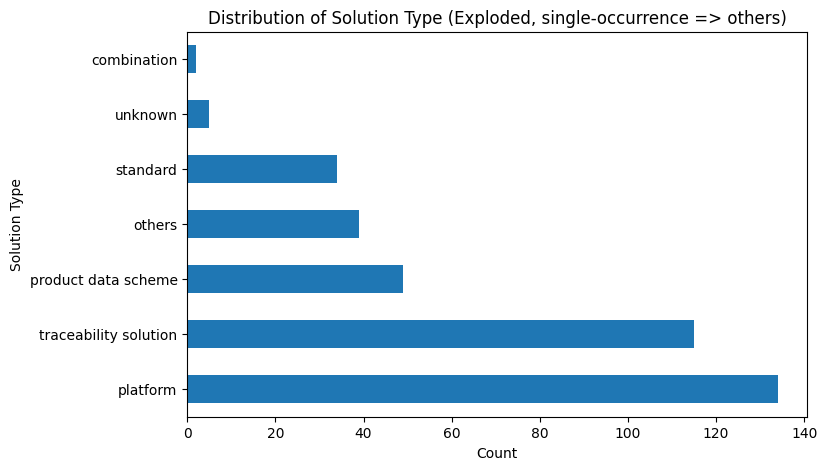

In [29]:
df_exploded = df_cleaned.explode('Solution_Type')

# Check frequency
counts = df_exploded['Solution_Type'].value_counts(dropna=False)
df_exploded['Solution_Type'] = df_exploded['Solution_Type'].apply(lambda x: 'others' if x in counts[counts == 1].index else x)
final_counts = df_exploded['Solution_Type'].value_counts(dropna=False)
print(final_counts)

# Plot a bar chart
final_counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Solution Type (Exploded, single-occurrence => others)")
plt.xlabel("Count")
plt.ylabel("Solution Type")
plt.show()

Sector
textile         100
cross-sector     98
others           60
electronics      50
battery          40
automotive       36
food             32
construction     21
Name: count, dtype: int64


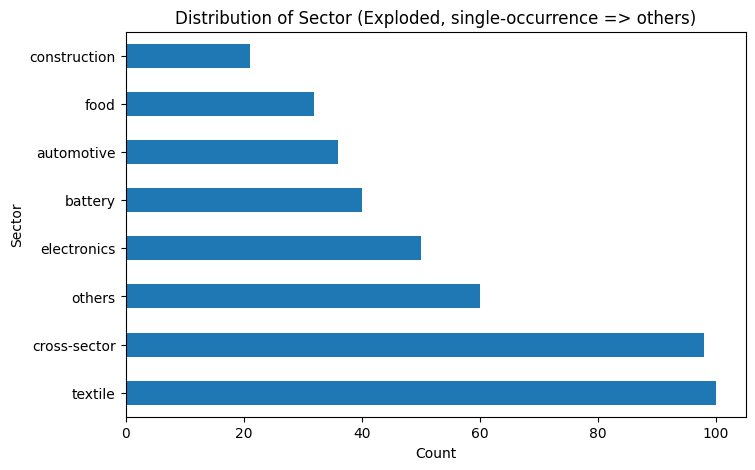

In [30]:
df_exploded = df_cleaned.explode('Sector')

# Check frequency
counts = df_exploded['Sector'].value_counts(dropna=False)
df_exploded['Sector'] = df_exploded['Sector'].apply(lambda x: 'others' if x in counts[counts == 1].index else x)
final_counts = df_exploded['Sector'].value_counts(dropna=False)
print(final_counts)

# Plot a bar chart
final_counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Sector (Exploded, single-occurrence => others)")
plt.xlabel("Count")
plt.ylabel("Sector")
plt.show()

Host_Organization_Type
private company (industry)      159
research                         21
association                      15
public organization (policy)     13
public-private consortium        12
ngo                               8
unknown                           1
public (eig)                      1
trade associations                1
Name: count, dtype: int64


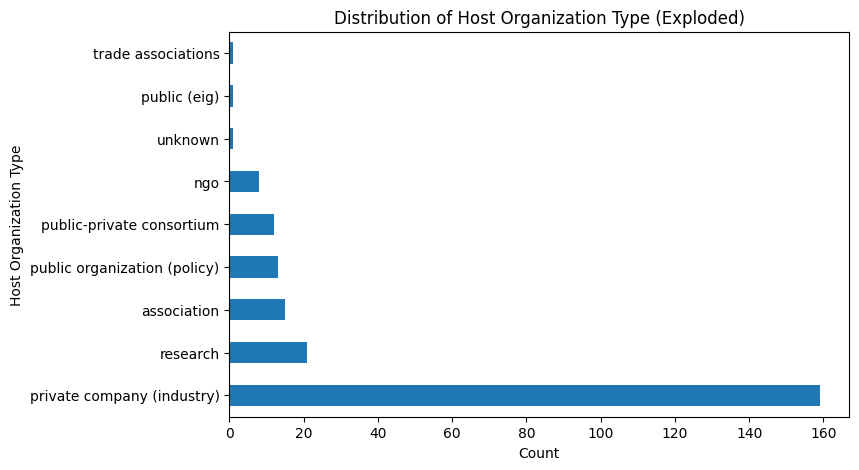

In [31]:
df_exploded = df_cleaned.explode('Host_Organization_Type')

# Check frequency
counts = df_exploded['Host_Organization_Type'].value_counts(dropna=False)
print(counts)

# Plot a bar chart
counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Host Organization Type (Exploded)")
plt.xlabel("Count")
plt.ylabel("Host Organization Type")
plt.show()

Focus_Final_Product_Supply_Chain
Both                     138
Final Product             47
Supply chain exchange     17
Unknown                    3
Name: count, dtype: int64


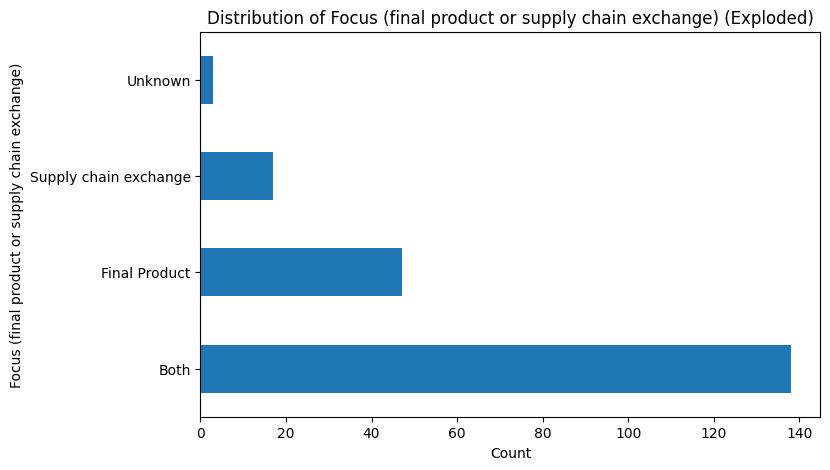

In [32]:
df_exploded = df_cleaned.explode('Focus_Final_Product_Supply_Chain')

# Check frequency
counts = df_exploded['Focus_Final_Product_Supply_Chain'].value_counts(dropna=False)
print(counts)

# Plot a bar chart
counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Focus (final product or supply chain exchange) (Exploded)")
plt.xlabel("Count")
plt.ylabel("Focus (final product or supply chain exchange)")
plt.show()

Market_Scope
International    135
EU                44
National          16
Regional           8
Unknown            2
Name: count, dtype: int64


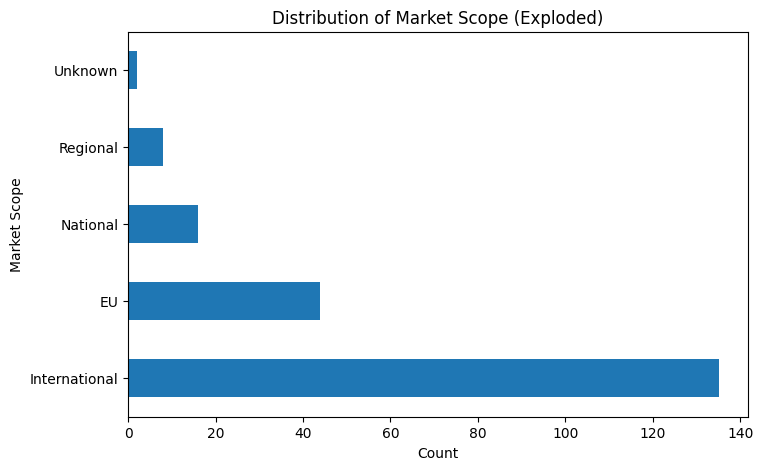

In [33]:
df_exploded = df_cleaned.explode('Market_Scope')

# Check frequency
counts = df_exploded['Market_Scope'].value_counts(dropna=False)
print(counts)

# Plot a bar chart
counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Market Scope (Exploded)")
plt.xlabel("Count")
plt.ylabel("Market Scope")
plt.show()

Current_Market_Penetration
Low        120
High        43
Medium      36
Unknown      6
Name: count, dtype: int64


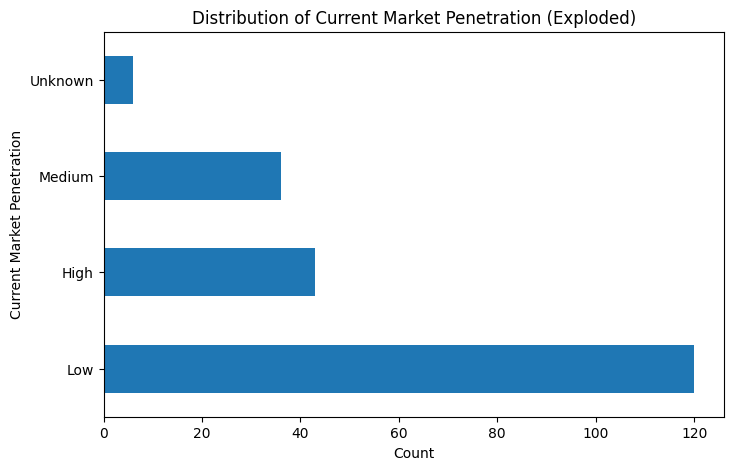

In [34]:
df_exploded = df_cleaned.explode('Current_Market_Penetration')

# Check frequency
counts = df_exploded['Current_Market_Penetration'].value_counts(dropna=False)
print(counts)

# Plot a bar chart
counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Current Market Penetration (Exploded)")
plt.xlabel("Count")
plt.ylabel("Current Market Penetration")
plt.show()

Business_Model
Pay per use                               90
Membership fee (per size and free use)    64
Free                                      41
Unknown                                   10
Name: count, dtype: int64


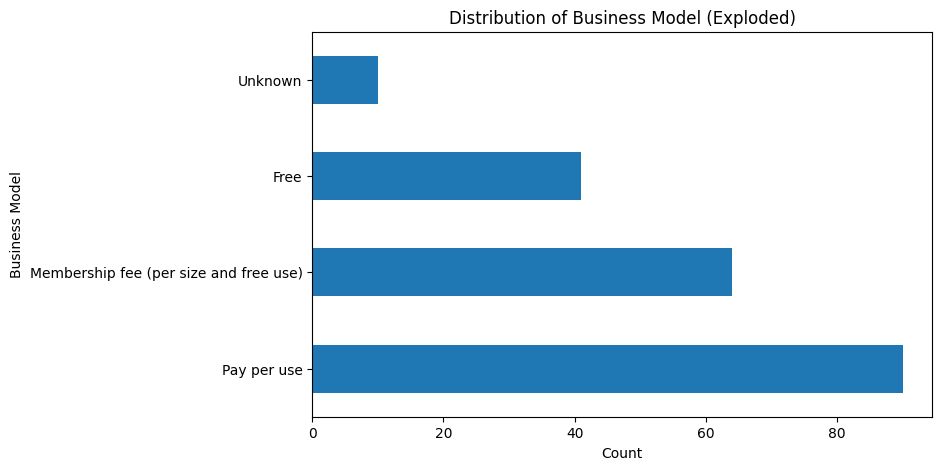

In [35]:
df_exploded = df_cleaned.explode('Business_Model')

# Check frequency
counts = df_exploded['Business_Model'].value_counts(dropna=False)
print(counts)

# Plot a bar chart
counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Business Model (Exploded)")
plt.xlabel("Count")
plt.ylabel("Business Model")
plt.show()

Target_Group
distributor and retailer                                136
consumer/public                                         126
reuse                                                   122
repair                                                  122
remanufacturer                                          122
product developer and designer                          107
circular economy and interdisciplinary experts          100
recycler                                                 96
production identification                                95
technology / platform providers                          88
product identity providers                               74
refurbishment / washing and textile services             73
certification bodies                                     72
recycling material distributor and retailer              71
government institutions                                  68
waste treatment and sorter                               66
collection                 

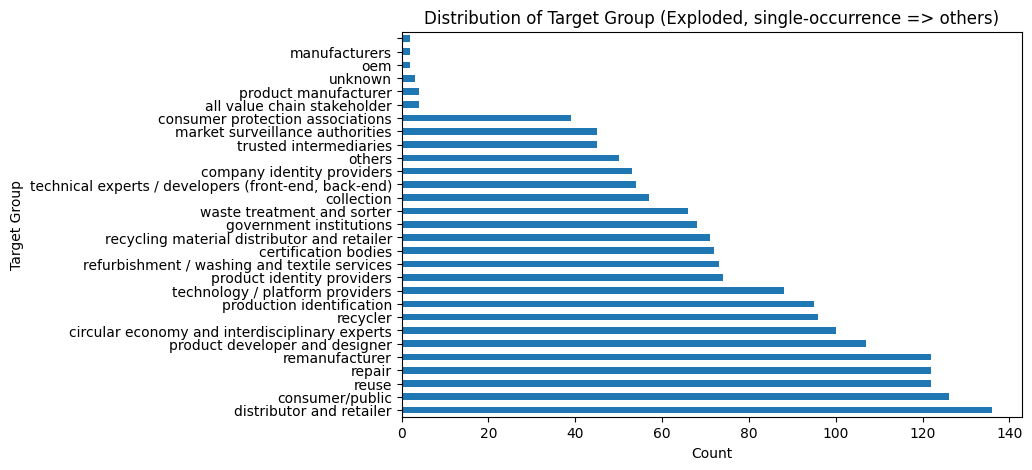

In [36]:
df_exploded = df_cleaned.explode('Target_Group')

# Check frequency
counts = df_exploded['Target_Group'].value_counts(dropna=False)
df_exploded['Target_Group'] = df_exploded['Target_Group'].apply(lambda x: 'others' if x in counts[counts == 1].index else x)
final_counts = df_exploded['Target_Group'].value_counts(dropna=False)
print(final_counts)

# Plot a bar chart
final_counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Target Group (Exploded, single-occurrence => others)")
plt.xlabel("Count")
plt.ylabel("Target Group")
plt.show()

Product_Traceability
date                                    159
locations                               155
operators                               124
transport means (e.g. vessel, track)     94
unknown                                  33
Name: count, dtype: int64


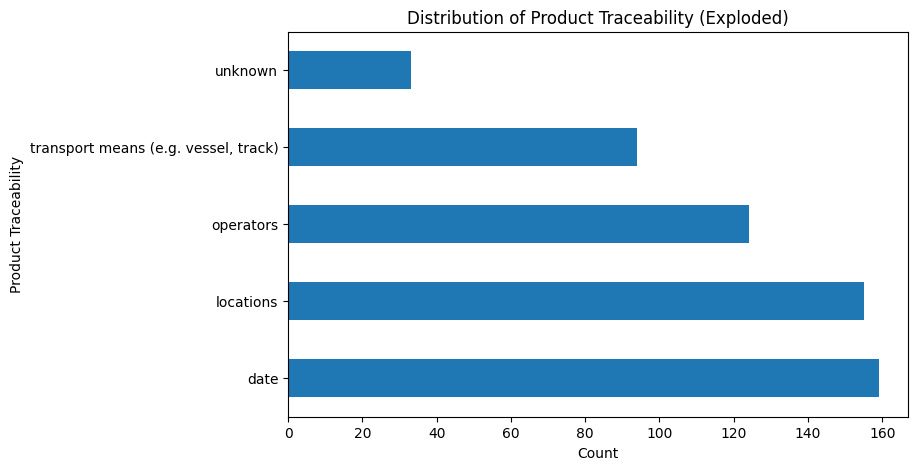

In [37]:
df_exploded = df_cleaned.explode('Product_Traceability')

# Check frequency
counts = df_exploded['Product_Traceability'].value_counts(dropna=False)
print(counts)

# Plot a bar chart
counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Product Traceability (Exploded)")
plt.xlabel("Count")
plt.ylabel("Product Traceability")
plt.show()

Identifier_Type
qr code              160
rfid                  93
digital watermark     52
unknown               35
bluetooth label       32
Name: count, dtype: int64


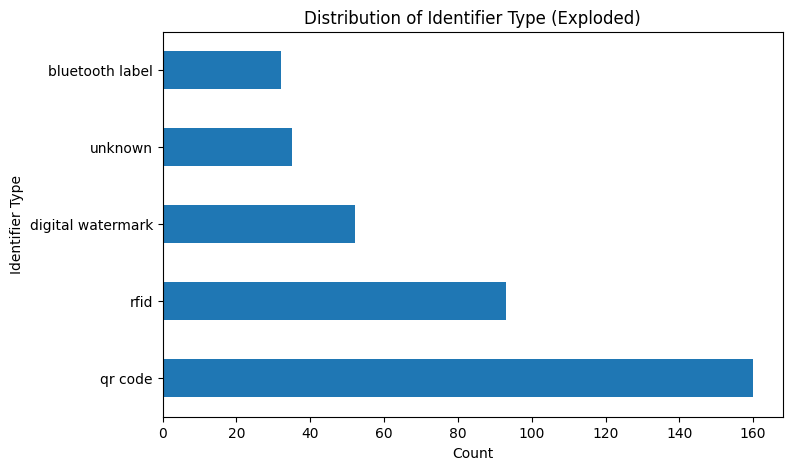

In [38]:
df_exploded = df_cleaned.explode('Identifier_Type')

# Check frequency
counts = df_exploded['Identifier_Type'].value_counts(dropna=False)
print(counts)

# Plot a bar chart
counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Identifier Type (Exploded)")
plt.xlabel("Count")
plt.ylabel("Identifier Type")
plt.show()

Identifier_Type
qr code              160
rfid                  93
digital watermark     52
unknown               35
bluetooth label       32
Name: count, dtype: int64


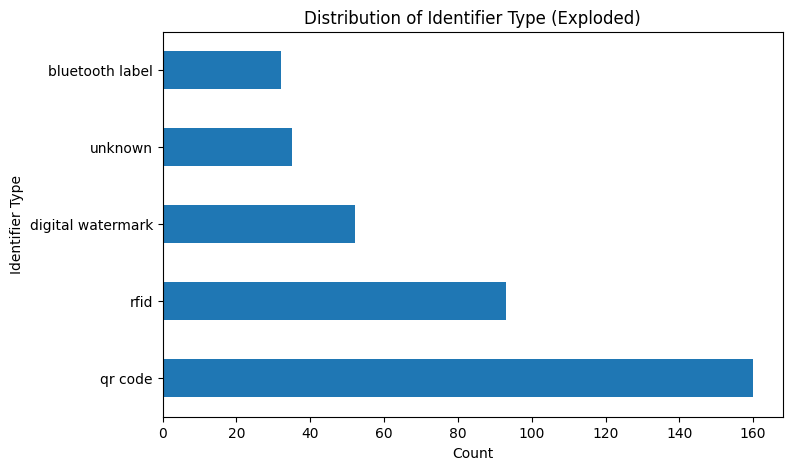

In [39]:
df_exploded = df_cleaned.explode('Identifier_Type')

# Check frequency
counts = df_exploded['Identifier_Type'].value_counts(dropna=False)
print(counts)

# Plot a bar chart
counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Identifier Type (Exploded)")
plt.xlabel("Count")
plt.ylabel("Identifier Type")
plt.show()

ID_Minting
Centralized      86
Decentralized    83
Unknown          36
Name: count, dtype: int64


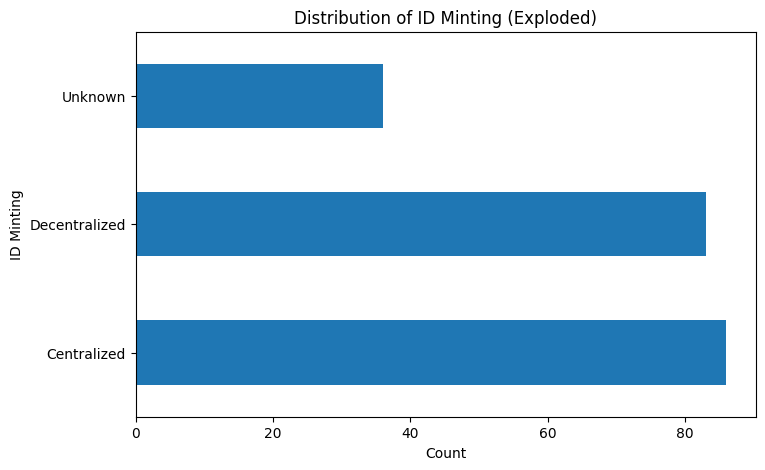

In [40]:

df_exploded = df_cleaned.explode('ID_Minting')

# Check frequency
counts = df_exploded['ID_Minting'].value_counts(dropna=False)
print(counts)

# Plot a bar chart
counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of ID Minting (Exploded)")
plt.xlabel("Count")
plt.ylabel("ID Minting")
plt.show()

Data_Storage_Location
Decentralized    103
Centralized       76
Unknown           26
Name: count, dtype: int64


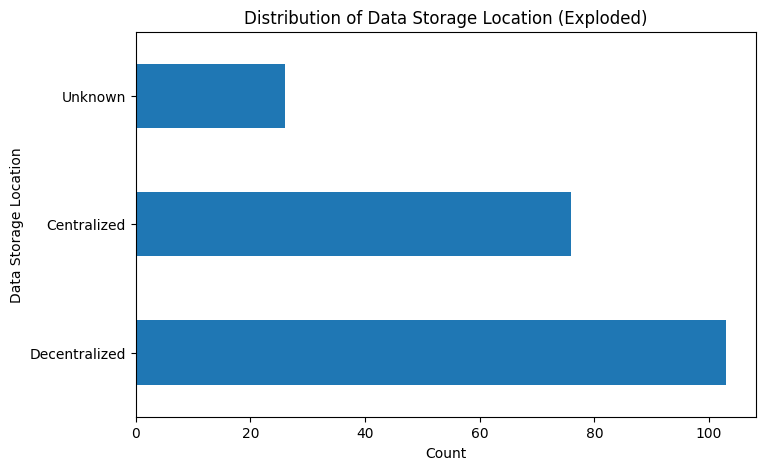

In [41]:

df_exploded = df_cleaned.explode('Data_Storage_Location')

# Check frequency
counts = df_exploded['Data_Storage_Location'].value_counts(dropna=False)
print(counts)

# Plot a bar chart
counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Data Storage Location (Exploded)")
plt.xlabel("Count")
plt.ylabel("Data Storage Location")
plt.show()

Data_Packaging
API              111
Data transfer     55
Unknown           39
Name: count, dtype: int64


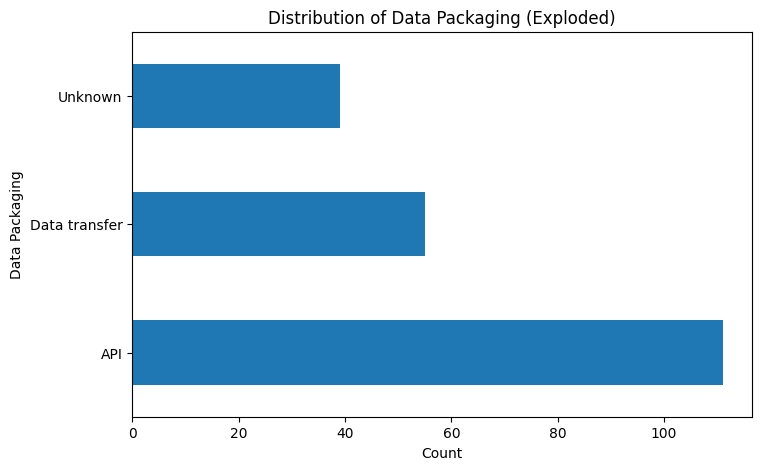

In [42]:

df_exploded = df_cleaned.explode('Data_Packaging')

# Check frequency
counts = df_exploded['Data_Packaging'].value_counts(dropna=False)
print(counts)

# Plot a bar chart
counts.plot(kind='barh', figsize=(8,5))
plt.title("Distribution of Data Packaging (Exploded)")
plt.xlabel("Count")
plt.ylabel("Data Packaging")
plt.show()

Text heavy:
Goal_USP_Benefit
Traceability
Data_Protection
Evidence
Convenience
Data_Transport_Openness_Level

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Preprocess text
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
doc_term_matrix = vectorizer.fit_transform(df_cleaned['Goal_USP_Benefit'].dropna())

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1:
['information', 'products', 'brands', 'solution', 'supply', 'digital', 'traceability', 'chain', 'product', 'data']
Topic 2:
['knowledge', 'passport', 'platform', 'products', 'data', 'dpp', 'digital', 'product', 'supply', 'chain']
Topic 3:
['connect', 'create', 'traceability', 'battery', 'economy', 'technology', 'use', 'solution', 'circular', 'data']
Topic 4:
['materials', 'standards', 'solution', 'information', 'dpp', 'textile', 'digital', 'products', 'data', 'product']
Topic 5:
['brands', 'cost', 'use', 'codes', 'traceability', 'countermark', 'qr', 'digital', 'blockchain', 'product']


In [92]:
def plot_filtered_heatmap(df, col1, col2):
    """
    Creates a heatmap showing the relationship between two categorical variables,
    filtering both columns by replacing single-occurrence values with 'others'.

    Steps:
    - Compute value counts BEFORE exploding
    - Replace low-frequency categories with 'others'
    - Explode both columns
    - Generate cross-tabulation
    - Plot heatmap
    """
    df_temp = df_cleaned.copy()

    # Compute initial value counts BEFORE exploding
    counts_col1 = df_temp[col1].explode().value_counts()
    counts_col2 = df_temp[col2].explode().value_counts()

    # Replace single-occurrence values with 'others' BEFORE exploding
    df_temp[col1] = df_temp[col1].apply(lambda x: [v if counts_col1.get(v, 0) > 1 else 'others' for v in x] if isinstance(x, list) else x)
    df_temp[col2] = df_temp[col2].apply(lambda x: [v if counts_col2.get(v, 0) > 1 else 'others' for v in x] if isinstance(x, list) else x)

    # Explode both columns
    df_temp = df_temp.explode(col1).explode(col2)

    # Generate cross-tabulation
    heatmap_data = pd.crosstab(df_temp[col1], df_temp[col2])

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt="d", linewidths=0.5)
    plt.title(f"Heatmap of {col1} vs. {col2}")
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.show()

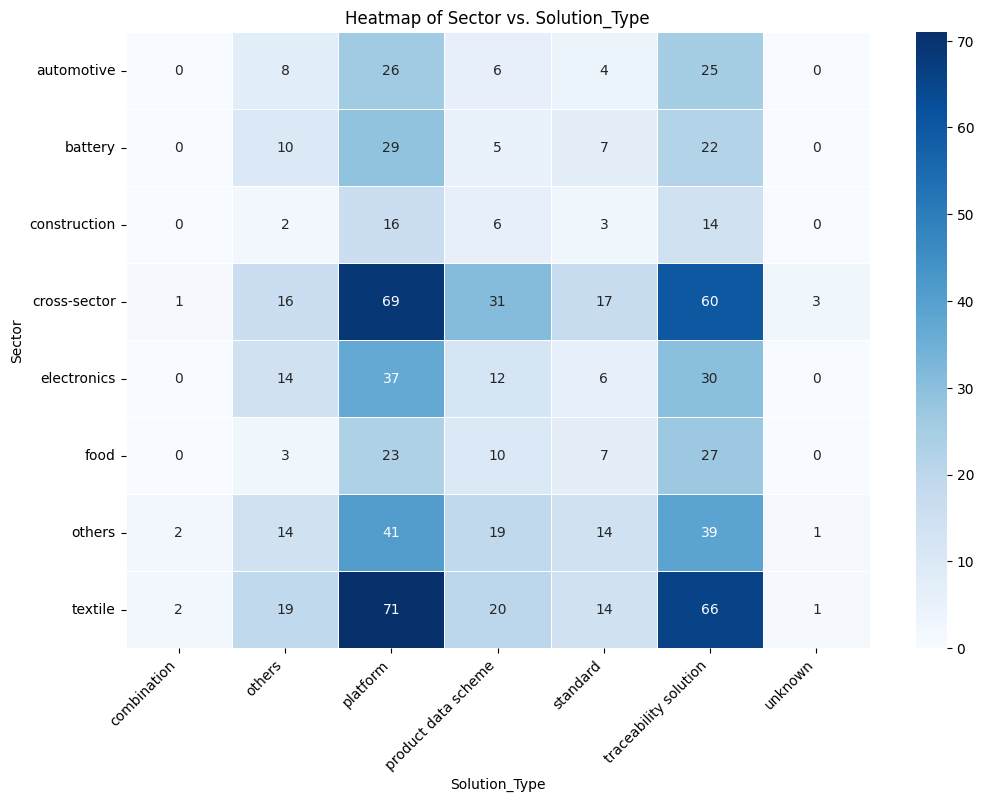

In [93]:
plot_filtered_heatmap(df_cleaned, 'Sector', 'Solution_Type')

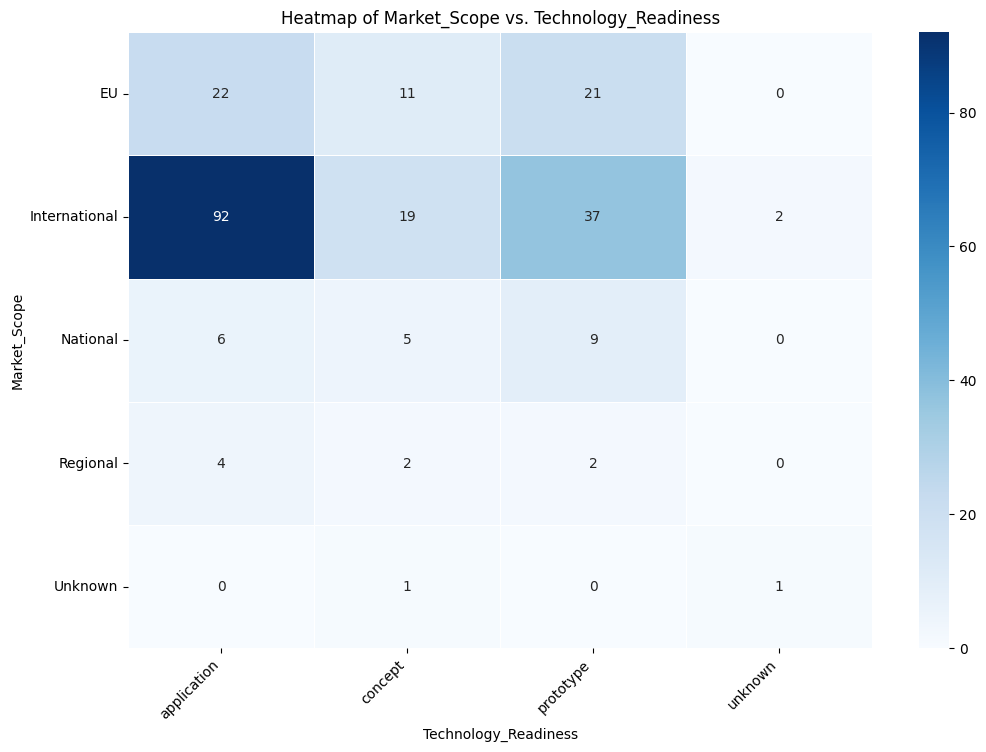

In [94]:
plot_filtered_heatmap(df_cleaned, 'Market_Scope', 'Technology_Readiness')

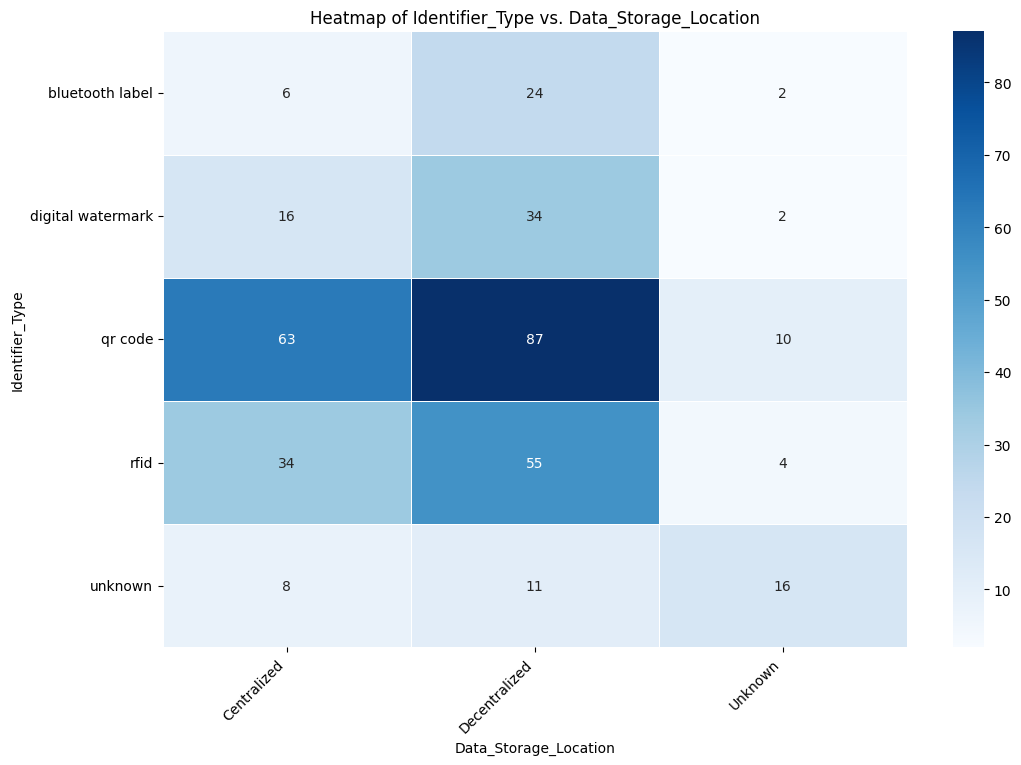

In [95]:
plot_filtered_heatmap(df_cleaned, 'Identifier_Type', 'Data_Storage_Location')

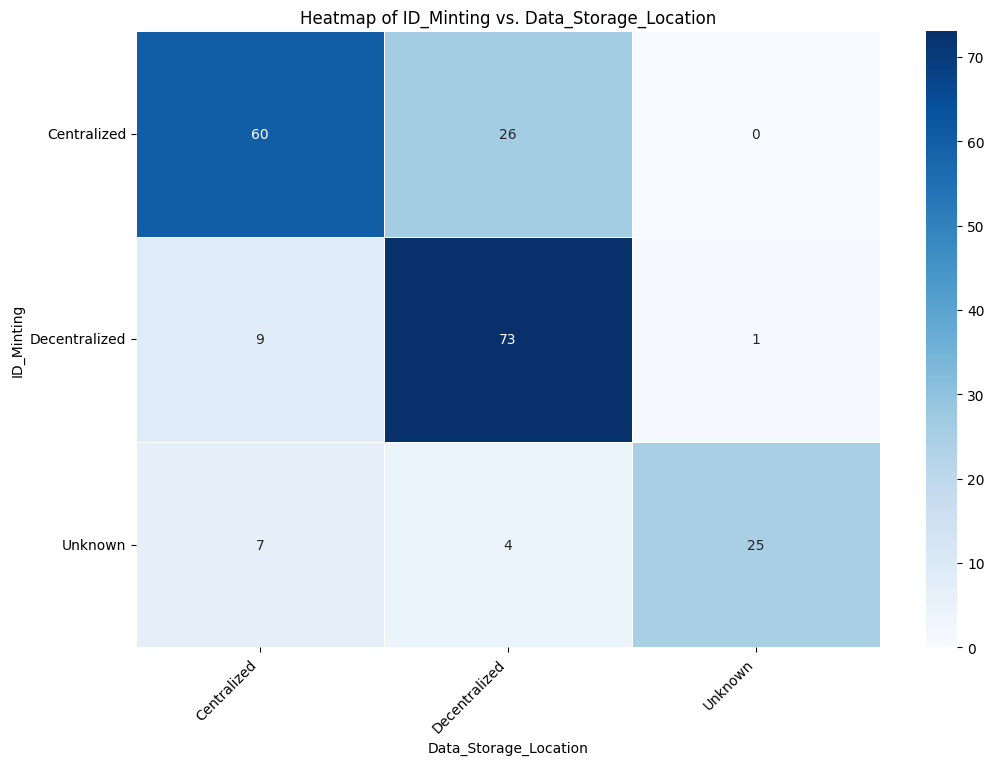

In [97]:
plot_filtered_heatmap(df_cleaned, 'ID_Minting', 'Data_Storage_Location')

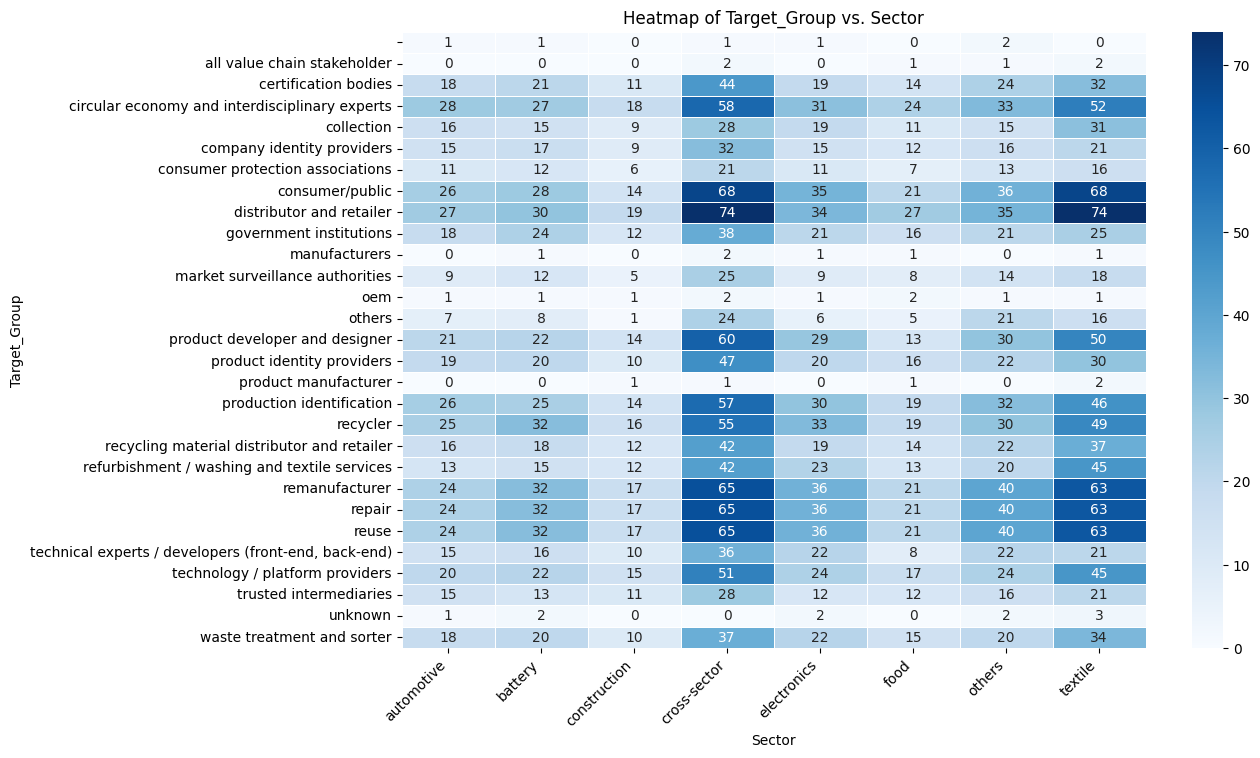

In [99]:
plot_filtered_heatmap(df_cleaned, 'Target_Group', 'Sector')